# Matplotlib templates

notes on creating your own company matplotlib style template for reuse.

In [ ]:
from matplotlib import font_manager

names = font_manager.get_font_names()
[i for i in names if 'Sans Serif' in i]

['Microsoft Sans Serif']

# Creating a Custom Company Matplotlib Style

This guide walks through the process of creating a reusable matplotlib style for company branding. We'll use the NVIDIA style as an example but the principles apply to any company.

## 1. Gather Brand Assets

Before coding, collect:
- Primary brand colors (hex codes)
- Secondary/accent colors
- Typography guidelines
- Any specific visual guidelines (spacing, borders, etc.)
- Examples of existing company visualizations

## 2. Structure Your Style Module

Create a new Python file (e.g., `company_style.py`) with this basic structure:

```python
class CompanyStyle:
    # Store brand colors as class variables
    COLORS = {
        'primary': '#000000',
        'secondary': '#000000',
        'accent': '#000000',
        'background': '#FFFFFF',
        'grid': '#E6E6E6',
    }
    
    @classmethod
    def setup_style(cls):
        """Define the style dictionary"""
        pass
    
    @classmethod
    def apply_style(cls):
        """Apply style globally"""
        pass
    
    @classmethod
    def context(cls):
        """Context manager for temporary style"""
        pass
    
    @staticmethod
    def set_title(ax, title, subtitle=None):
        """Helper for consistent titles"""
        pass
```

## 3. Define Style Elements

Work through each category of style elements:

### 3.1 Figure Settings
```python
style = {
    'figure.facecolor': cls.COLORS['background'],
    'figure.dpi': 120,
    'figure.figsize': (12, 7),
    'figure.titlesize': 16,
    'figure.titleweight': 'bold',
}
```

### 3.2 Axes Settings
```python
style.update({
    'axes.facecolor': cls.COLORS['background'],
    'axes.edgecolor': cls.COLORS['primary'],
    'axes.labelcolor': cls.COLORS['primary'],
    'axes.grid': True,
    'axes.spines.top': False,  # Modern look
    'axes.spines.right': False,
})
```

### 3.3 Color Cycle
```python
from cycler import cycler

style['axes.prop_cycle'] = cycler('color', [
    cls.COLORS['primary'],
    cls.COLORS['secondary'],
    cls.COLORS['accent'],
    # Add more colors...
])
```

### 3.4 Typography
```python
style.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
})
```

## 4. Implement Core Methods

### 4.1 Style Setup
```python
@classmethod
def setup_style(cls):
    """Create the style dictionary"""
    style = {
        # All your style settings here
    }
    return style

@classmethod
def apply_style(cls):
    """Apply style globally"""
    plt.style.use('default')  # Reset first
    style = cls.setup_style()
    plt.rcParams.update(style)

@classmethod
def context(cls):
    """Get context manager"""
    return plt.style.context(cls.setup_style())
```

### 4.2 Helper Methods
```python
@staticmethod
def set_title(ax, title, subtitle=None):
    """Consistent title formatting"""
    ax.set_title(title, pad=20, weight='bold', size=14)
    if subtitle:
        ax.text(0.5, 1.05, subtitle, 
                transform=ax.transAxes,
                ha='center', size=10)
```

## 5. Testing Your Style

Create a test function that demonstrates different plot types:

```python
def demo_style():
    """Create demonstration plots"""
    with CompanyStyle.context():
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Line plot
        ax1.plot(x, y1, label='Series 1')
        ax1.plot(x, y2, label='Series 2')
        CompanyStyle.set_title(ax1, 'Line Plot')
        
        # Scatter plot
        ax2.scatter(x, y, alpha=0.6)
        CompanyStyle.set_title(ax2, 'Scatter Plot')
        
        # Add more plot types...
        
        plt.tight_layout()
        return fig
```

## 6. Best Practices

1. **Modularity**: Keep colors separate from style definitions for easy updates
2. **Documentation**: Document color codes and their usage
3. **Flexibility**: Provide both global and context manager options
4. **Testing**: Test with various plot types and data densities
5. **Helpers**: Create helper methods for common operations
6. **Defaults**: Choose sensible defaults that work for most cases
7. **Consistency**: Maintain consistent spacing and typography

## 7. Advanced Features

Consider adding:
- Custom colormaps for heatmaps
- Special formatting for specific plot types (boxplots, histograms)
- Export presets for different use cases
- Additional helper methods for common company visualizations

## 8. Distribution

1. Create a simple installation process
2. Document usage clearly
3. Include example plots
4. Provide templates for common company visualizations

## Example Implementation

```python
# Example of a minimal but complete style implementation
class MinimalCompanyStyle:
    COLORS = {
        'primary': '#76B900',
        'secondary': '#1A1A1A',
        'background': '#FFFFFF',
    }
    
    @classmethod
    def setup_style(cls):
        return {
            'figure.facecolor': cls.COLORS['background'],
            'axes.prop_cycle': cycler('color', [
                cls.COLORS['primary'],
                cls.COLORS['secondary'],
            ]),
            'font.family': 'sans-serif',
            'axes.grid': True,
        }
    
    @classmethod
    def context(cls):
        return plt.style.context(cls.setup_style())
```

Remember: A good company style strikes a balance between brand identity and data visualization best practices. Not every element needs to be customized - focus on the elements that matter most for your brand identity.

## Code

In [15]:
"""nvidia_style.py - NVIDIA-themed matplotlib style module"""

import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

class NvidiaStyle:
    """NVIDIA corporate matplotlib style handler"""
    
    # Brand Colors
    COLORS = {
        'nvidia_green': '#76B900',
        'black': '#1A1A1A',
        'dark_gray': '#666666',
        'light_gray': '#999999',
        'background': '#FFFFFF',
        'grid': '#E6E6E6',
        'green_dark': '#2B7C00',
        'green_medium': '#4C9900',
    }
    
    @classmethod
    def setup_style(cls):
        """Create the NVIDIA style dictionary"""
        style = {
            # Figure
            'figure.facecolor': cls.COLORS['background'],
            'figure.dpi': 150,
            'figure.figsize': (10, 7),
            'figure.titlesize': 16,
            'figure.titleweight': 'bold',
            
            # Axes
            'axes.facecolor': cls.COLORS['background'],
            'axes.edgecolor': cls.COLORS['black'],
            'axes.labelcolor': cls.COLORS['black'],
            'axes.grid': True,
            'axes.grid.which': 'both',
            'axes.labelsize': 12,
            'axes.labelweight': 'bold',
            'axes.spines.top': False,
            'axes.spines.right': False,
            'axes.linewidth': 1.5,
            'axes.prop_cycle': cycler('color', [
                cls.COLORS['nvidia_green'],
                cls.COLORS['black'],
                cls.COLORS['dark_gray'],
                cls.COLORS['green_dark'],
                cls.COLORS['light_gray'],
                cls.COLORS['green_medium'],
                '#333333'
            ]),
            
            # Grid
            'grid.color': cls.COLORS['grid'],
            'grid.linestyle': '-',
            'grid.linewidth': 0.8,
            'grid.alpha': 0.5,
            
            # Lines
            'lines.linewidth': 2.5,
            'lines.markersize': 8,
            'lines.markeredgewidth': 1.5,
            'lines.markeredgecolor': cls.COLORS['black'],
            
            # Ticks
            'xtick.color': cls.COLORS['black'],
            'ytick.color': cls.COLORS['black'],
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'xtick.major.size': 6,
            'ytick.major.size': 6,
            'xtick.minor.size': 4,
            'ytick.minor.size': 4,
            'xtick.major.width': 1.5,
            'ytick.major.width': 1.5,
            'xtick.minor.width': 1,
            'ytick.minor.width': 1,
            'xtick.direction': 'out',
            'ytick.direction': 'out',
            
            # Font
            'font.family': 'sans-serif',
            'font.sans-serif': ['DejaVu Sans', 'Arial', 'Helvetica'],
            'font.size': 10,
            'font.weight': 'medium',
            
            # Legend
            'legend.facecolor': cls.COLORS['background'],
            'legend.edgecolor': cls.COLORS['black'],
            'legend.fontsize': 10,
            'legend.title_fontsize': 12,
            'legend.framealpha': 0.9,
            'legend.borderpad': 0.4,
            'legend.labelspacing': 0.5,
            'legend.handlelength': 2.0,
            'legend.handleheight': 0.7,
            'legend.handletextpad': 0.5,
            
            # Saving figures
            'savefig.dpi': 300,
            'savefig.bbox': 'tight',
            'savefig.pad_inches': 0.2,
            'savefig.facecolor': cls.COLORS['background'],
            'savefig.edgecolor': cls.COLORS['background'],
            
            # Special formatting for boxplots
            'boxplot.flierprops.color': cls.COLORS['nvidia_green'],
            'boxplot.flierprops.markerfacecolor': cls.COLORS['nvidia_green'],
            'boxplot.flierprops.markeredgecolor': cls.COLORS['black'],
            'boxplot.boxprops.color': cls.COLORS['black'],
            'boxplot.whiskerprops.color': cls.COLORS['black'],
            'boxplot.capprops.color': cls.COLORS['black'],
            'boxplot.medianprops.color': cls.COLORS['nvidia_green'],
            
            # Histogram settings
            'hist.bins': 50,
        }
        return style

    @classmethod
    def apply_style(cls):
        """Apply NVIDIA style globally"""
        plt.style.use('default')  # Reset to default
        style = cls.setup_style()
        plt.rcParams.update(style)
    
    @classmethod
    def context(cls):
        """Get context manager for temporary style application"""
        return plt.style.context(cls.setup_style())
    
    @staticmethod
    def set_nvidia_title(ax, title, subtitle=None):
        """Apply NVIDIA-styled title to an axis"""
        ax.set_title(title, pad=20, weight='bold', size=14)
        if subtitle:
            ax.text(0.5, 1.05, subtitle, 
                   transform=ax.transAxes,
                   ha='center', size=10,
                   style='italic',
                   color=NvidiaStyle.COLORS['dark_gray'])

def demo_nvidia_style():
    """Create a demonstration plot using the NVIDIA style"""
    import numpy as np
    
    with NvidiaStyle.context():
        # Create sample data
        np.random.seed(42)
        x = np.linspace(0, 10, 100)
        y1 = np.sin(x) + np.random.normal(0, 0.1, 100)
        y2 = np.cos(x) + np.random.normal(0, 0.1, 100)
        y3 = -np.sin(x) + np.random.normal(0, 0.1, 100)
        
        # Create figure
        fig = plt.figure(figsize=(15, 10))
        
        # 1. Line plot
        ax1 = plt.subplot(221)
        ax1.plot(x, y1, label='RTX 4090')
        ax1.plot(x, y2, label='RTX 4080')
        ax1.plot(x, y3, label='RTX 4070')
        NvidiaStyle.set_nvidia_title(ax1, 'GPU Performance Comparison', 
                                   'Real-time Ray Tracing Performance')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('FPS')
        ax1.legend()
        
        # 2. Scatter plot
        ax2 = plt.subplot(222)
        ax2.scatter(y1, y2, alpha=0.6, label='Data Points')
        NvidiaStyle.set_nvidia_title(ax2, 'Performance Correlation')
        ax2.set_xlabel('GPU Utilization (%)')
        ax2.set_ylabel('Frame Time (ms)')
        ax2.legend()
        
        # 3. Histogram
        ax3 = plt.subplot(223)
        ax3.hist(y1, bins=30, alpha=0.7, label='Distribution')
        NvidiaStyle.set_nvidia_title(ax3, 'Frame Time Distribution')
        ax3.set_xlabel('Frame Time (ms)')
        ax3.set_ylabel('Frequency')
        ax3.legend()
        
        # 4. Box plot
        ax4 = plt.subplot(224)
        data = [y1, y2, y3]
        ax4.boxplot(data, labels=['RTX 4090', 'RTX 4080', 'RTX 4070'])
        NvidiaStyle.set_nvidia_title(ax4, 'Performance Comparison')
        ax4.set_ylabel('Frame Time (ms)')
        
        plt.suptitle('NVIDIA GPU Performance Analysis', size=16, weight='bold')
        plt.tight_layout()
        return fig

# if __name__ == "__main__":
#     # Example usage
#     fig = demo_nvidia_style()
#     plt.show()

Demo

/var/folders/d5/nxx4jgmn0_5clxt1q54qmb740000gp/T/ipykernel_39742/2493372065.py:189: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(data, labels=['RTX 4090', 'RTX 4080', 'RTX 4070'])


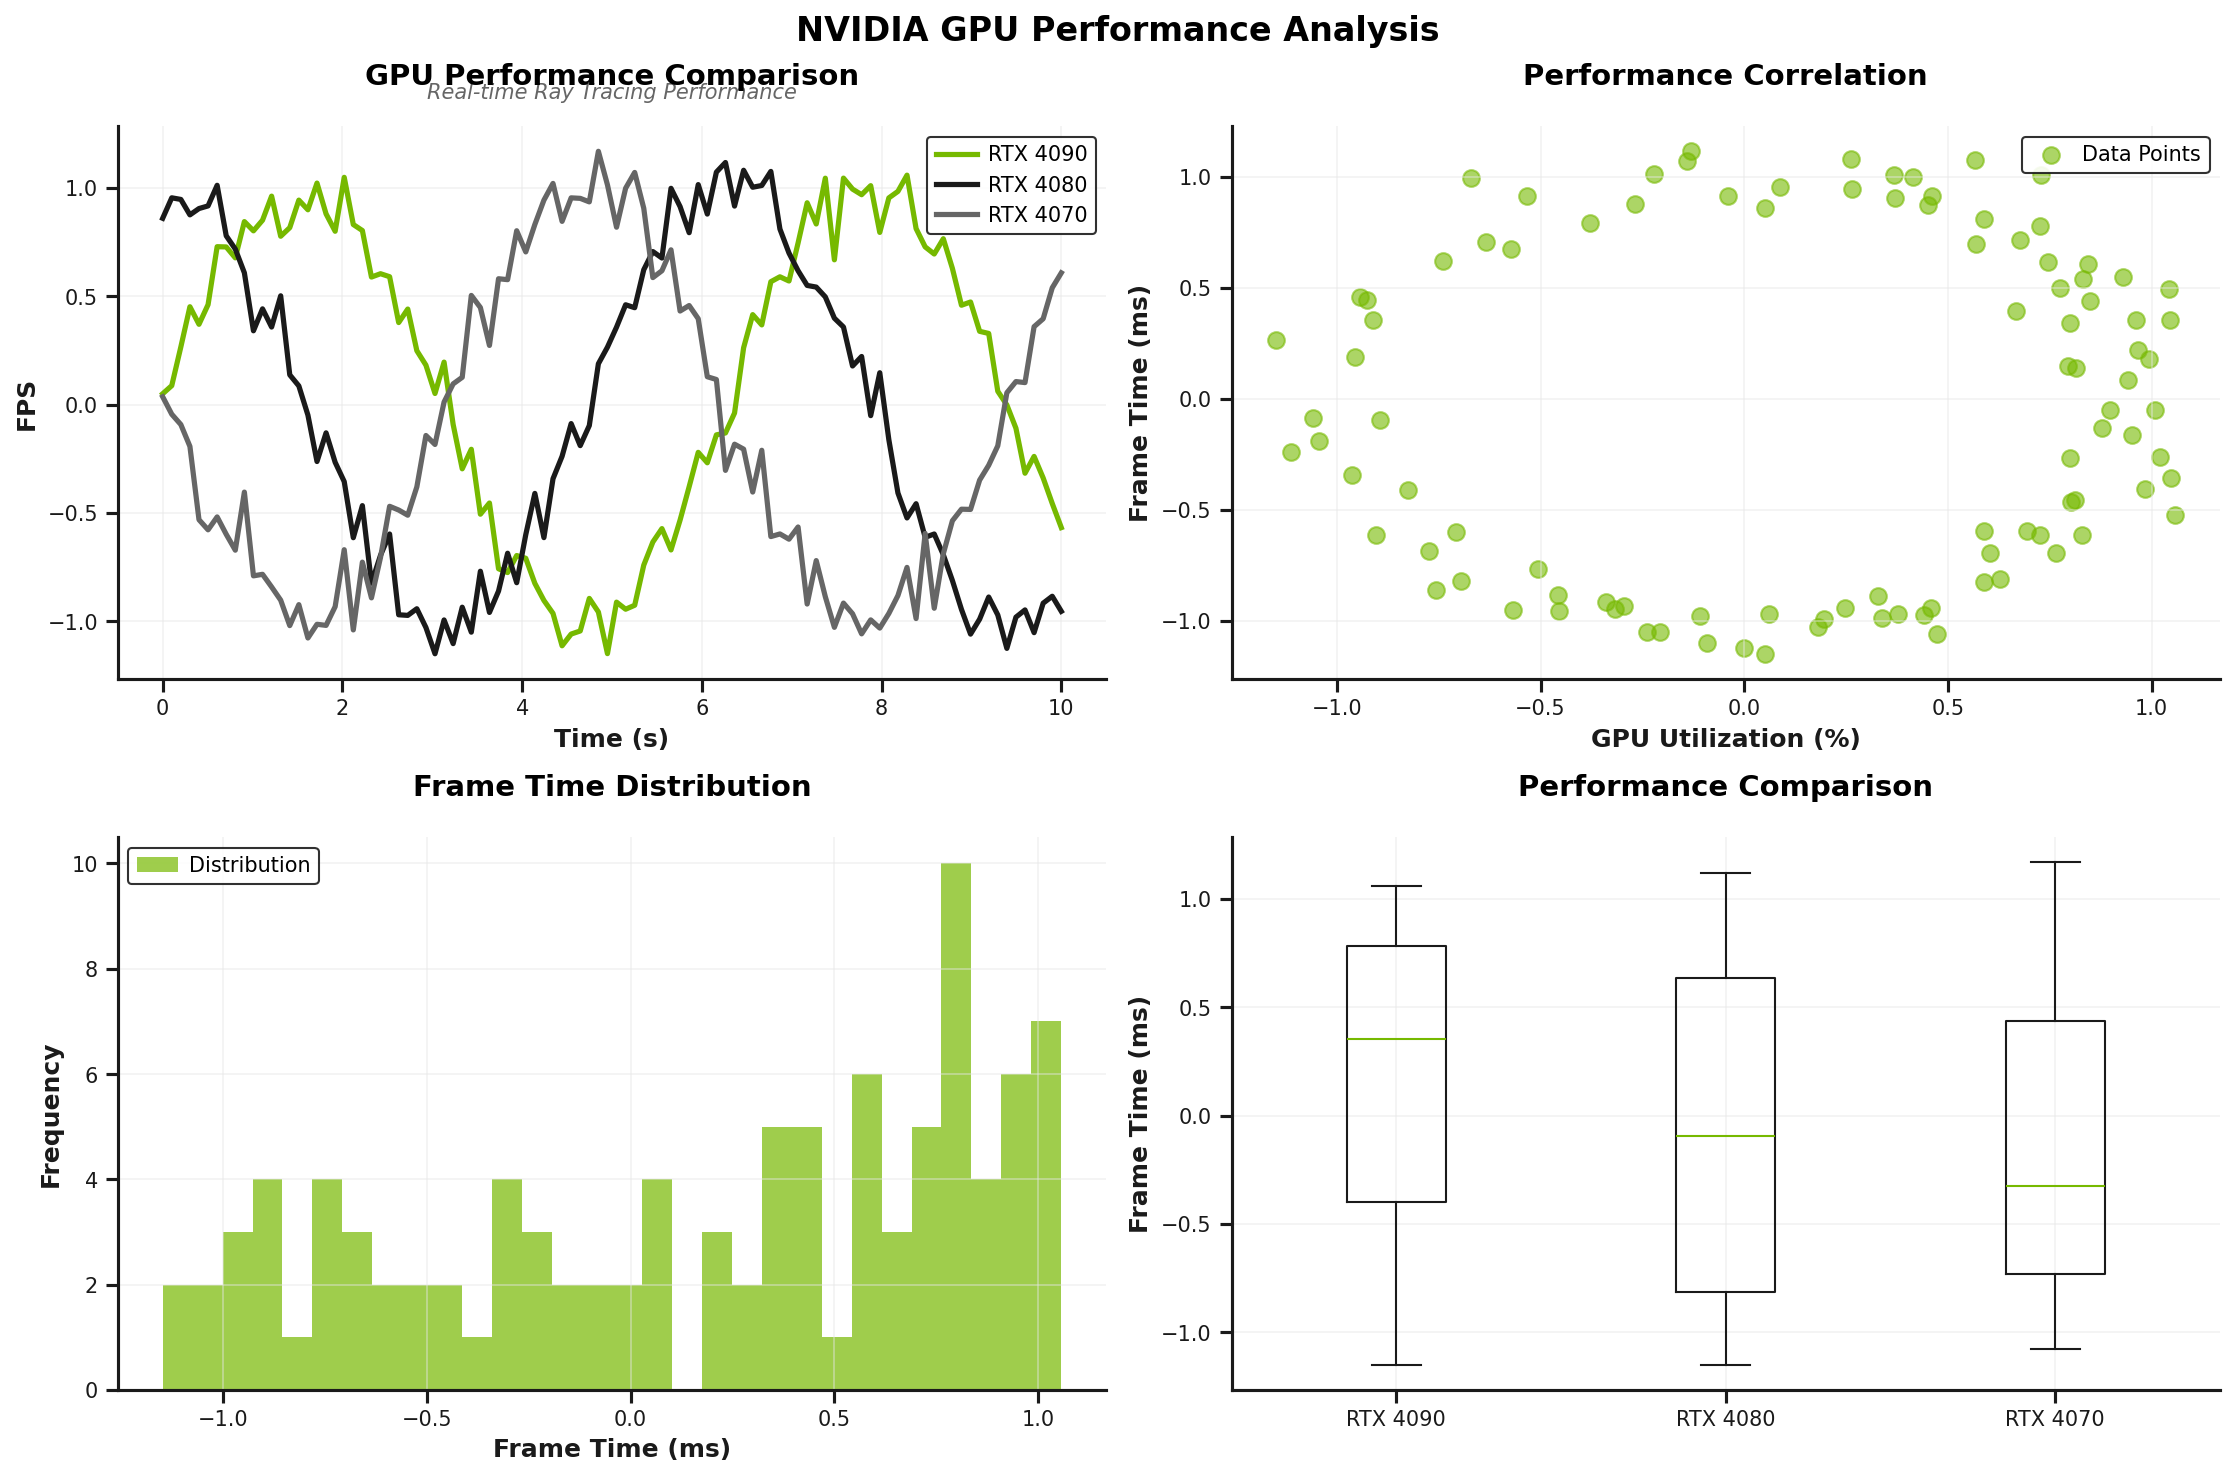

In [16]:
fig = demo_nvidia_style()
plt.show()